In [30]:
library(tidyverse)
theme_set(theme_classic())
options(jupyter.rich_display=T)

# Lecture 24: Global income inequality

For the final (non-review) lecture we'll examine some fascinating data from the [World Inequality Database](https://wid.world/).

A useful summary of all the available data plus definitions is available [here](https://wid.world/summary-table/). To get the data, you can interactively build queries using their [table builder](https://wid.world/data/), or access it programmatically using the `WID` library:

In [15]:
library(wid)
download_wid()

ERROR: Error in download_wid(): you must select at least some specific indicators, areas, or both.


The indicators and series available are catalogged on the following two help pages:

In [100]:
?wid_concepts

In [48]:
?wid_series_type

Some interesting concepts are:
- `ptinc`: pre-tax national income
- `nninc`: net national income
- `hweal`: net personal wealth
- `fiint` / `fidiv`: interest & dividends income

In [103]:
?download_wid

## Example: what are the richest countries?

In [113]:
nninc <- download_wid(indicators = "anninc", perc="p0p100", ages="999", years=1975:2015) %>% as_tibble 

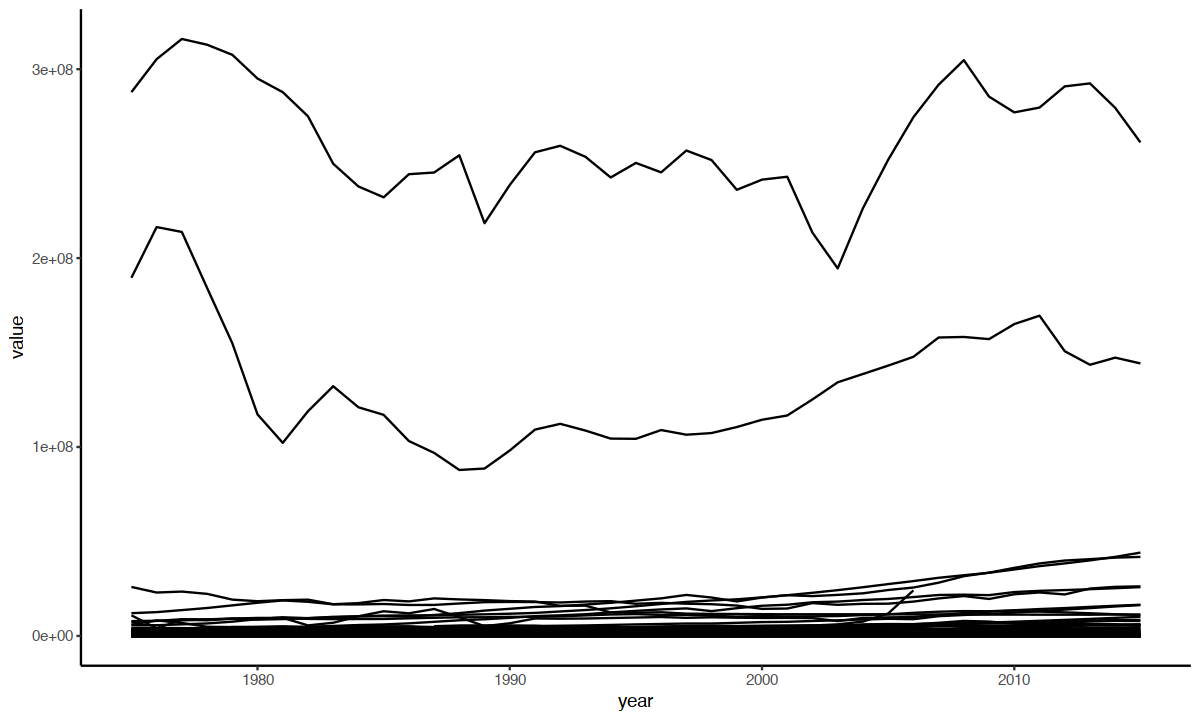

In [115]:
ggplot(nninc) + geom_line(aes(x=year, y=value, group=country))

We need to adjust these numbers to be comparable. 

In [116]:
ppp <- download_wid(
    indicators = "xlcusp", # US PPP
    year = 2016 # Reference year only
) %>% rename(ppp=value) %>% select(-year, -percentile, -variable) %>% print

    country          ppp
1        AE    1.9402624
2        AF   20.1492210
3        AG    1.7348742
4        AL   43.5169490
5        AM  184.2594800
6        AO   85.1444090
7        AR    8.9592638
8        AT    0.8462856
9        AU    1.4339732
10       AW    1.1799568
11       AZ    0.3564854
12       BA    0.7021252
13       BB    1.8563217
14       BD   29.4824490
15       BE    0.8313662
16       BF  195.4079700
17       BG    0.6488945
18       BH    0.1805075
19       BI  578.5216700
20       BJ  205.6815200
21       BM    1.6818020
22       BN    0.4813737
23       BO    2.9821837
24       BR    1.9933791
25       BS    1.0030725
26       BT   20.9707680
27       BW    4.5729241
28       BY    0.5531066
29       BZ    1.1645356
30       CA    1.2043732
31       CD  597.0594500
32       CF  330.8120700
33       CG  209.7436400
34       CH    1.3016236
35       CI  238.1323900
36       CL  388.0899000
37       CM  228.5759300
38       CN    3.3426566
39    CN-RU    3.3426566


Joining, by = "country"
Warning message:
“Removed 1549 rows containing missing values (geom_path).”

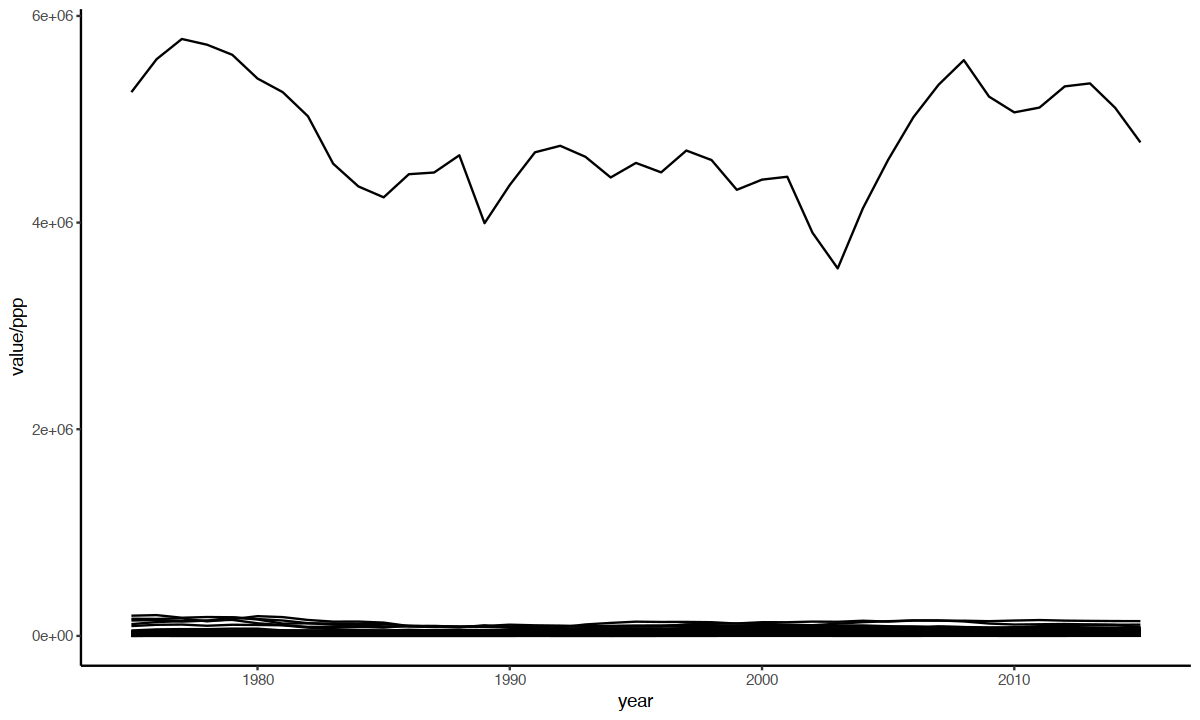

In [117]:
left_join(nninc, ppp) %>% ggplot + geom_line(aes(x=year, y=value / ppp, group=country))

In [119]:
left_join(nninc, ppp) %>% arrange(-value) %>% print

Joining, by = "country"


# A tibble: 9,648 x 6
   country variable   percentile  year     value   ppp
   <chr>   <chr>      <chr>      <int>     <dbl> <dbl>
 1 VE      anninc999i p0p100      1977 315989056  54.7
 2 VE      anninc999i p0p100      1978 312948896  54.7
 3 VE      anninc999i p0p100      1979 307609888  54.7
 4 VE      anninc999i p0p100      1976 305312576  54.7
 5 VE      anninc999i p0p100      2008 304766016  54.7
 6 VE      anninc999i p0p100      1980 295036800  54.7
 7 VE      anninc999i p0p100      2013 292478848  54.7
 8 VE      anninc999i p0p100      2007 291782464  54.7
 9 VE      anninc999i p0p100      2012 290891040  54.7
10 VE      anninc999i p0p100      1975 287844800  54.7
# … with 9,638 more rows


## Income distribution in the U.S.
To get the share of national income in the U.S., we run:

In [22]:
us.income.shares <- download_wid(indicators = "sptinc", areas = "US")

The data are organized into different percentiles:

In [23]:
table(us.income.shares$percentile)


          p0p1          p0p10         p0p100          p0p50          p0p90 
            51             51             51             53            102 
         p0p99        p10p100         p10p11         p10p20        p11p100 
            51             51             51             51             51 
        p11p12        p12p100         p12p13        p13p100         p13p14 
            51             51             51             51             51 
       p14p100         p14p15        p15p100         p15p16        p16p100 
            51             51             51             51             51 
        p16p17        p17p100         p17p18        p18p100         p18p19 
            51             51             51             51             51 
       p19p100         p19p20         p1p100           p1p2        p20p100 
            51             51             51             51             51 
        p20p21         p20p30        p21p100         p21p22        p22p100 
           

## Top 1% vs bottom 50% in the U.S.
Let's compare the share of national income of the top 1% versus the bottom 50% over time:

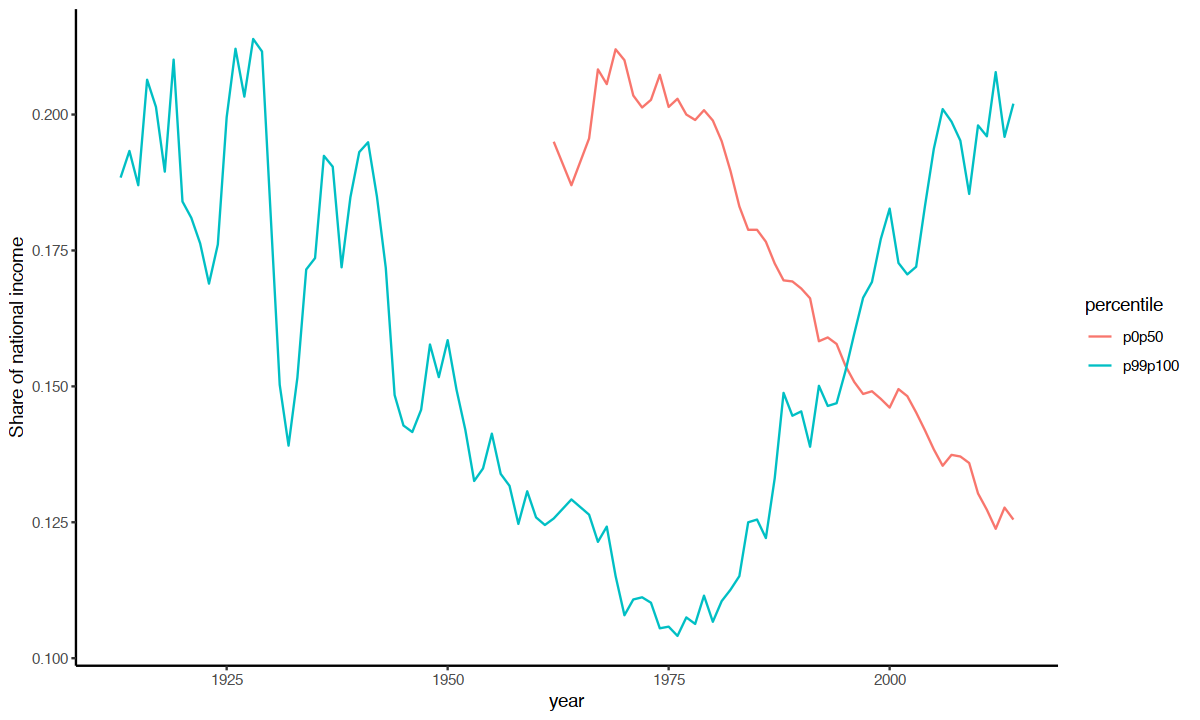

In [34]:
filter(us.income.shares, percentile %in% c("p0p50", "p99p100")) %>% ggplot + 
    geom_line(aes(x=year, y=value, group=percentile, color=percentile)) + ylab("Share of national income")

## Versus 1970
Alternatively, we can compare different fractiles of the income distribution over time.

Joining, by = "percentile"


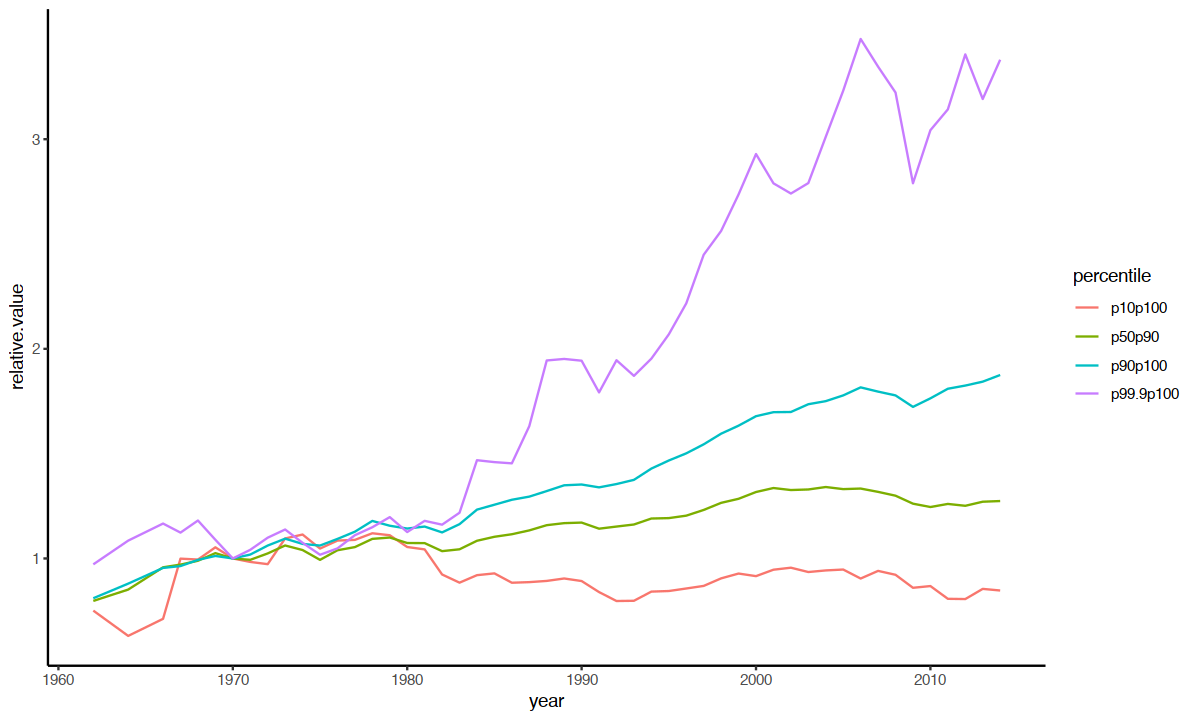

In [78]:
p <- c("p10p100", "p50p90", "p90p100", "p99.9p100")
us.income.totals <- download_wid(indicators = "tptinc", areas = "US", perc = p)
us.1970 <- filter(us.income.totals, year == 1970) %>% rename(value.1970 = value) %>% select(percentile, value.1970)
left_join(us.income.totals, us.1970) %>% mutate(relative.value = value / value.1970) %>% 
    ggplot + geom_line(aes(x=year, y=relative.value, group=percentile, color=percentile))

Compared to Canada:

Joining, by = c("country", "percentile")


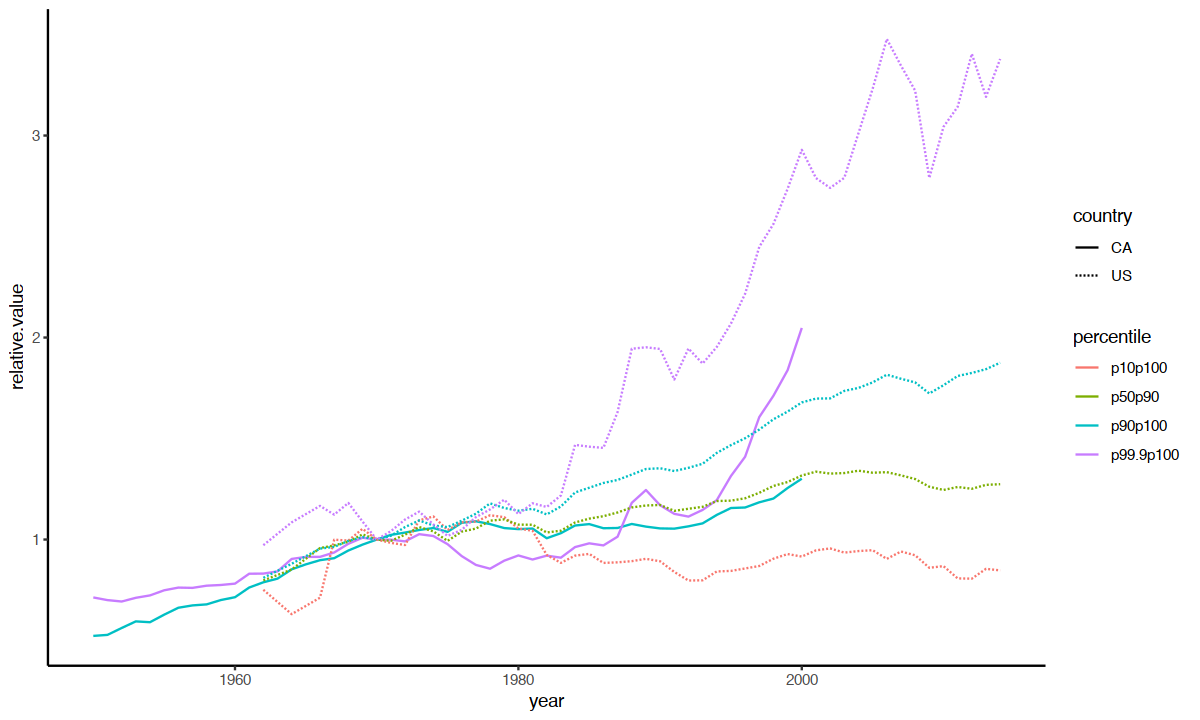

In [80]:
p <- c("p10p100", "p50p90", "p90p100", "p99.9p100")
income.totals <- download_wid(indicators = "tptinc", areas = c("US", "CA"), perc = p)
income.1970 <- filter(income.totals, year == 1970) %>% rename(value.1970 = value) %>% select(percentile, value.1970, country)
left_join(income.totals, income.1970) %>% mutate(relative.value = value / value.1970) %>% 
    ggplot + geom_line(aes(x=year, y=relative.value, group=interaction(percentile,country), color=percentile, linetype=country))

## Bottom 50% across countries
Next, we'll see how the bottom 50% have done over time in several countries in absolute terms.

In [87]:
# Average incomes data
countries <- c('RU', 'CN', 'US', 'TR', 'IN', 'BR')
avg.income <- download_wid(
    indicators = "aptinc", # Average pre-tax national income
    areas = countries,
    perc = "p0p50", # Bottom half of the population
    # pop = "j", # Equal-split individuals
    # year = 1978:2015
) 

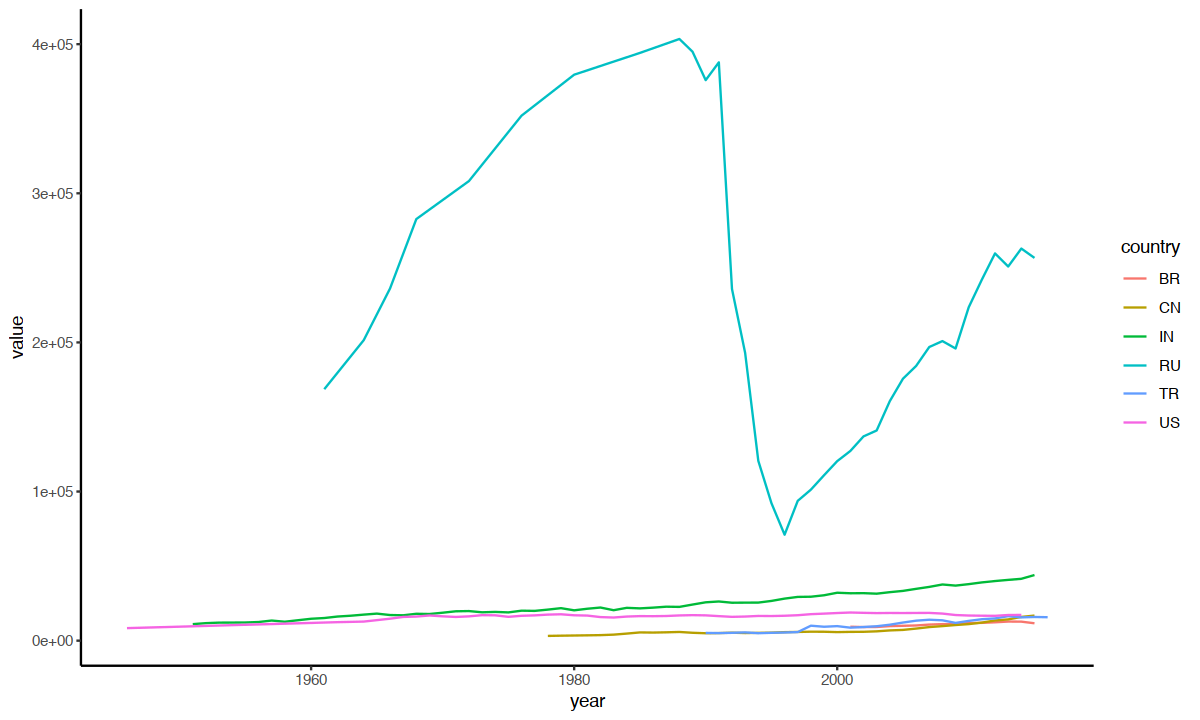

In [88]:
ggplot(avg.income) + geom_line(aes(x=year, y=value, group=country, color=country))

Joining, by = "country"


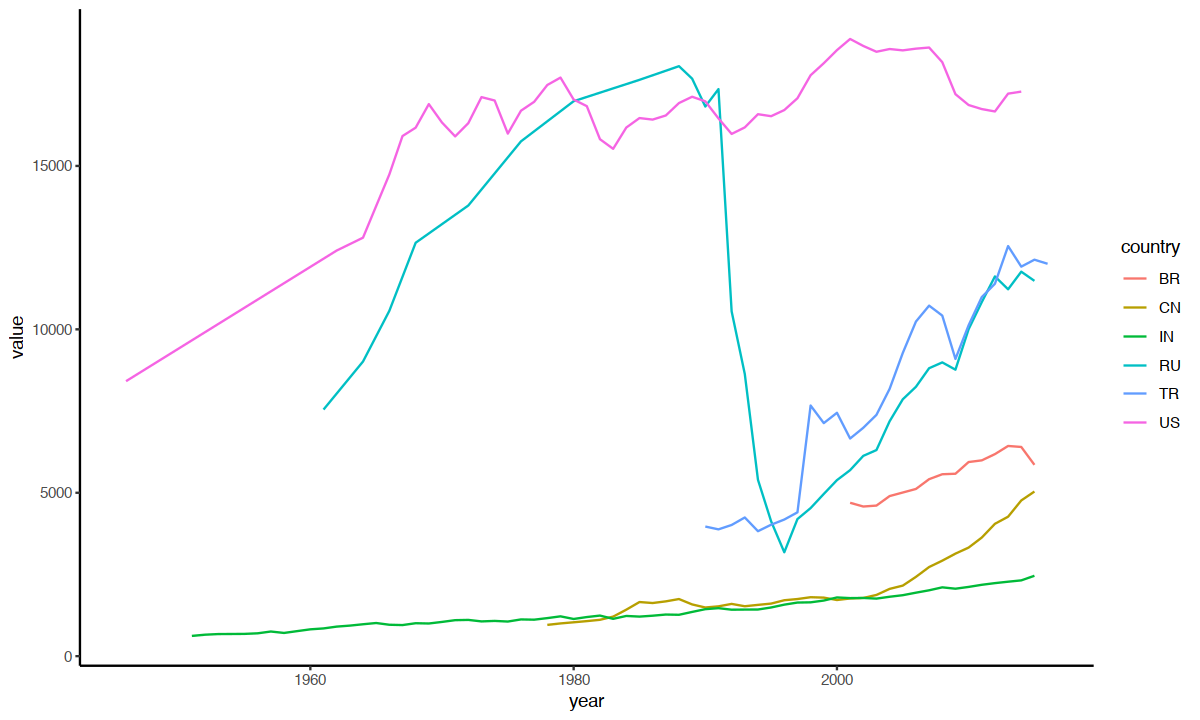

In [90]:
left_join(avg.income, ppp) %>% mutate(value = value / ppp) %>% ggplot + 
    geom_line(aes(x=year, y=value, group=country, color=country))

## Exercise
Can we build a linear model for the trajectory of average income in Russia?

In [120]:
# Solution

Russia is an interesting example. The fall of the USSR resulted in a massive loss of wealth. However it was not felt equally across all income levels:

Joining, by = "country"


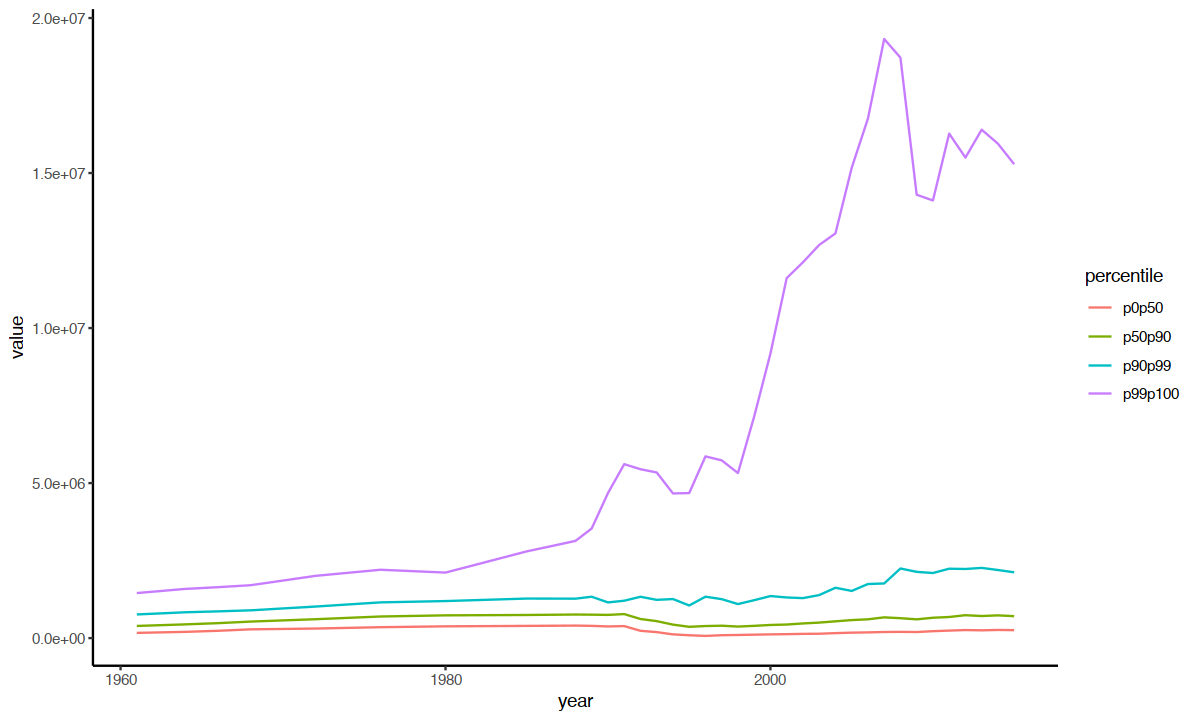

In [95]:
download_wid(
    indicators = "aptinc", # Average pre-tax national income
    areas = "RU",
    perc = c("p0p50", "p50p90", "p90p99", "p99p100")
    # pop = "j", # Equal-split individuals
    # year = 1978:2015
) %>% left_join(ppp) %>% mutate(ppp.value = value / ppp) %>% ggplot + 
    geom_line(aes(x=year, y=value, group=percentile, color=percentile))

Joining, by = "country"


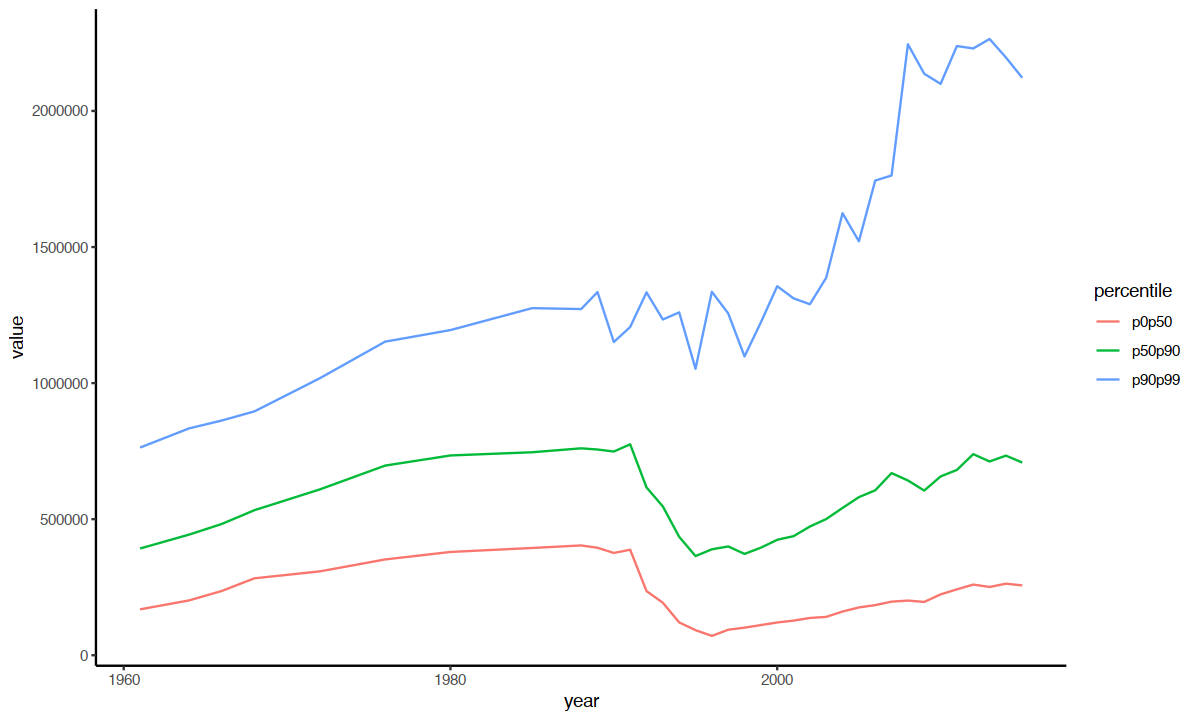

In [96]:
download_wid(
    indicators = "aptinc", # Average pre-tax national income
    areas = "RU",
    perc = c("p0p50", "p50p90", "p90p99")
    # pop = "j", # Equal-split individuals
    # year = 1978:2015
) %>% left_join(ppp) %>% mutate(ppp.value = value / ppp) %>% ggplot + 
    geom_line(aes(x=year, y=value, group=percentile, color=percentile))

Joining, by = "country"


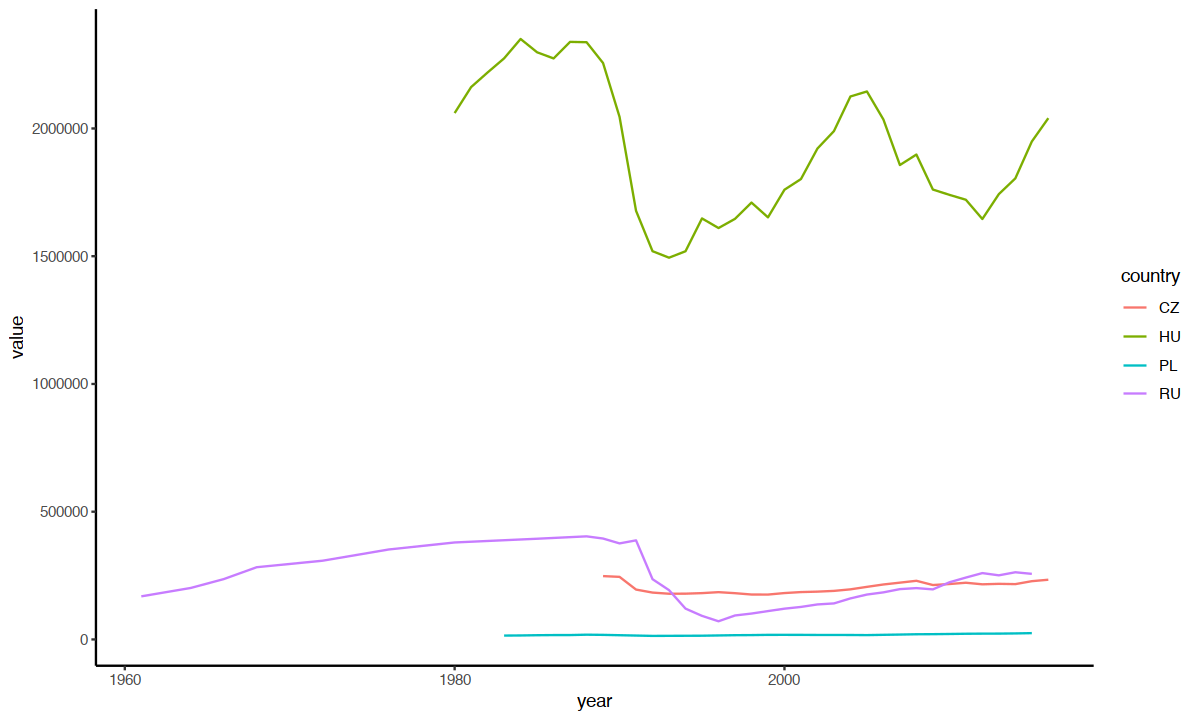

In [99]:
download_wid(
    indicators = "aptinc", # Average pre-tax national income
    areas = c("RU", "CU", "PL", "CZ", "HU"),
    perc = c("p0p50")
    # pop = "j", # Equal-split individuals
    # year = 1978:2015
) %>% left_join(ppp) %>% mutate(ppp.value = value / ppp) %>% ggplot + 
    geom_line(aes(x=year, y=value, group=country, color=country))

## Which countries have the greatest present-day income inequality?

In [ ]:
# Solution